In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
netflix=pd.read_csv("netflix_titles.csv")

In [33]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
netflix.shape

(8807, 12)

In [39]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [43]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [45]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [53]:
data=netflix.copy() #We copied it to the data file

In [55]:
data.shape

(8807, 12)

In [57]:
data=data.dropna() #clear to lack of data

In [61]:
data.shape

(5332, 12)

AttributeError: 'Axes' object has no attribute 'get_xticklables'

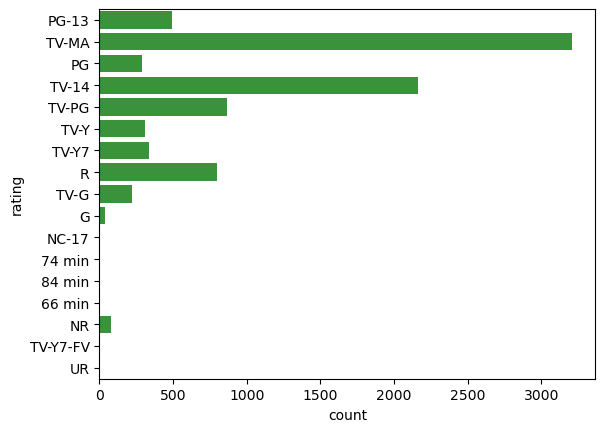

In [93]:
sns.countplot(netflix["rating"])#display with seaborn library
sns.countplot(netflix["rating"]).set_xticklabels(sns.countplot(netflix["rating"]).get_xticklables(),rotation=90,ha="right")
fig=plt.gcf()
fig.set_size_inches(13,13)
plt.title("rating")

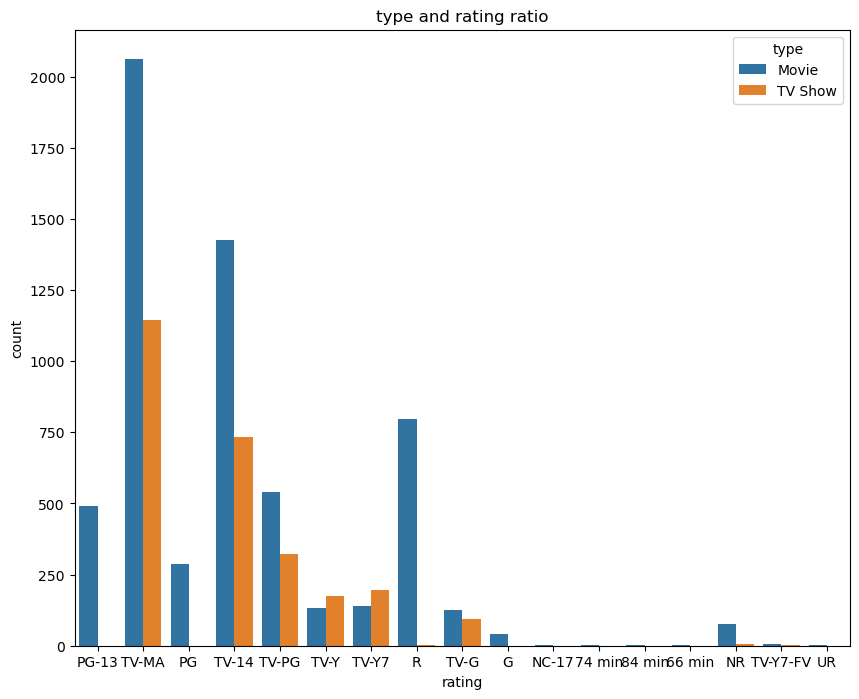

In [99]:
plt.figure(figsize=(10,8))
sns.countplot(x="rating",hue="type",data=netflix)
plt.title("type and rating ratio")
plt.show()

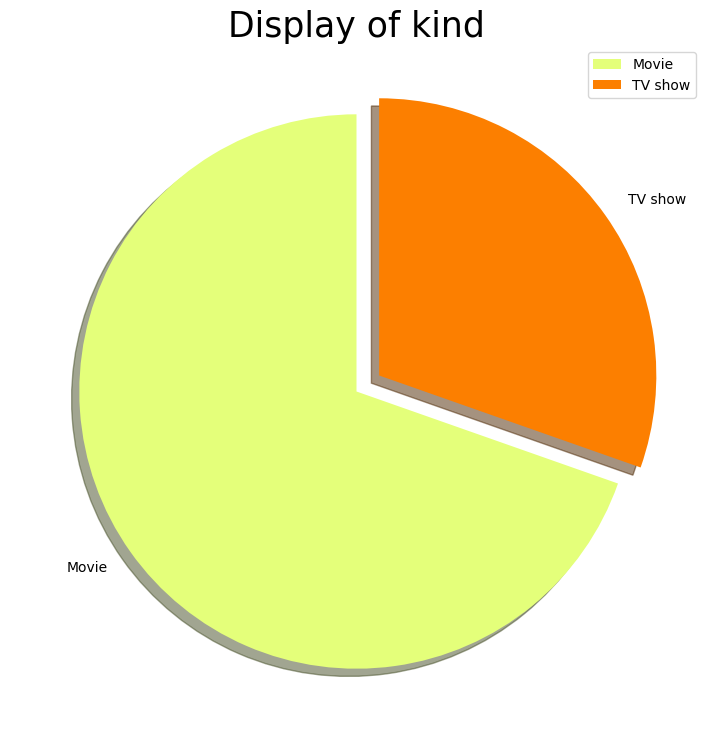

In [154]:
labels=["Movie","TV show"]
size=netflix["type"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"]=(9,9)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Display of kind",fontsize=25)
plt.legend()
plt.show()

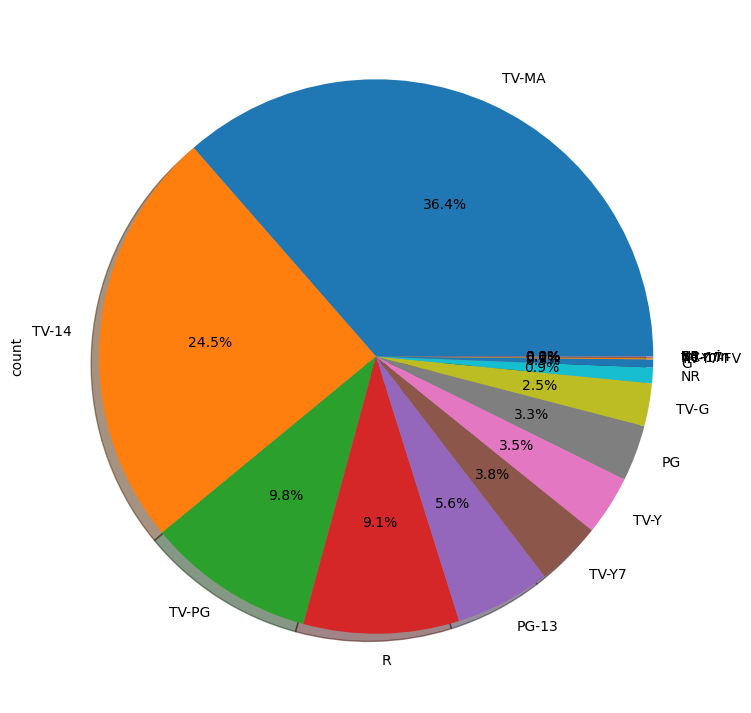

In [170]:
netflix["rating"].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,figsize=(11,9))
plt.show()

In [176]:
from wordcloud import WordCloud

In [174]:
pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 744.7 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


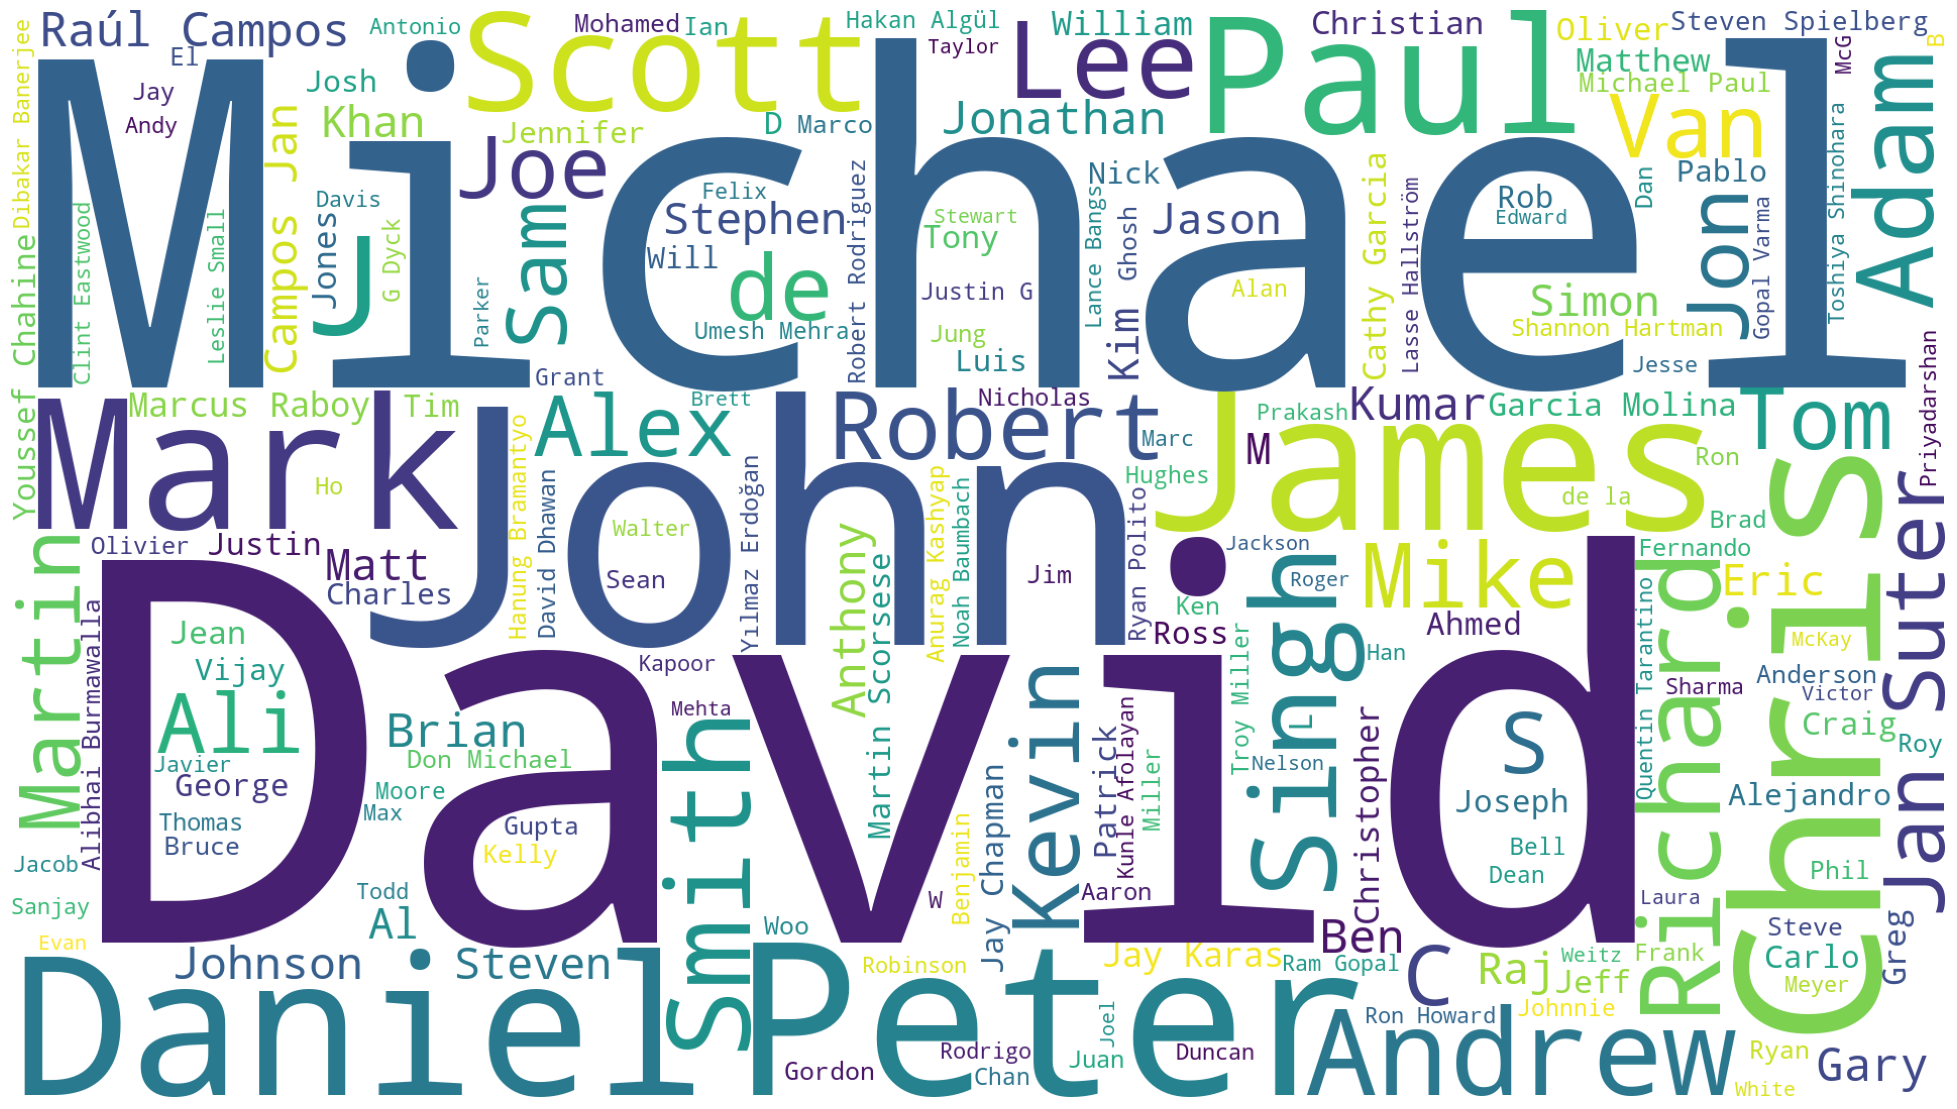

In [192]:
plt.subplots(figsize=(25,15))
wordcloud=WordCloud(
background_color="white",
    width=1920,
    height=1080
).generate(" ".join(data.director)) # cast,country,director
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("director.png") #burayı istedigin gibi degiştir  cast,country,director
plt.show()
